`nn` 是neural network的缩写，这个模块提供了各种构建深度学习模型的工具，比如神经网络层 (比如Linear, LSTM)、激活函数 (比如ReLU, Sigmoid)、损失函数 (MSE, Cross-Entropy Loss)等等。

In [57]:
import torch
from torch import nn
from torch.utils import data
import matplotlib.pyplot as plt

接下来我们用 `nn` 模块来实现线性回归模型，这相比于[从零开始实现线性回归](../Models/001LinearRegression.ipynb)而言代码上会更简洁，更加利用了PyTorch的特性。

生成人造数据集。

In [58]:
def synthetic_data(w, b, m, n):
    """
    生成 Y=wX+b+noise 
    
    :param w: weight vector 
    :param b: bias scalar
    :param m: number of samples
    :param n: number of features
    :return: Y, labels value vector
    """
    # 生成一个期望值为0，方差为1，m*n的input features
    X = torch.normal(0, 1, (m, n))
    Y = X @ w.reshape(n, 1) + b
    
    # 噪声
    Y += torch.normal(0, 0.1, (m, 1))
    
    return X, Y.reshape(-1, 1)

w = torch.tensor([2, -3.4])
b = 4.2
features, labels = synthetic_data(w, b, 200, len(w))

将数据集集合为Dataset，然后再分为不同的批次。

In [59]:
dataset = data.TensorDataset(features, labels)
dataloader = data.DataLoader(dataset, batch_size=3, shuffle=True)

使用 `nn.Linear` 模块并设定参数，**第一个参数表示输入特征的维度，$m * n$ 中的 $n$，第二个参数表示输出标签的维度**。用 `normal_` , `zero_` 等函数初始化模型的权重和偏差参数。

In [60]:
# 定义神经网络模型，只有线性回归这一层
net = nn.Linear(2, 1)

# 初始化线性回归模型中的参数
net.weight.data.normal_(0, 0.01)
net.bias.data.zero_()

tensor([0.])

使用MSE作为计算loss的标准，并且使用Stochastic Gradient Descent (SGD) 作为优化算法。`torch.optim.SGD` 接收两个参数，第一个参数是神经网络中所有的变量，在线性回归中就是权重和偏差；第二个参数就是学习率Learning Rate (lr)。

In [61]:
loss = nn.MSELoss()
optimizer = torch.optim.SGD(net.parameters(), lr=0.01)

正式的训练过程。

In [62]:
epochs = 40

epoch_history = []
loss_history = []

for epoch in range(epochs):
    for x, y in dataloader:
        # 向前传播并计算loss
        l = loss(net(x), y)
        # 将梯度清零，这一步必须放在backward之前
        optimizer.zero_grad()
        # 计算梯度
        l.backward()
        # 更新参数
        optimizer.step()
    # 计算在新参数下的loss
    l = loss(net(features), labels)
    print(f'epoch: {epoch + 1}, loss: {l:.10f}')
    
    epoch_history.append(epoch + 1)
    # 将tensor转换为numpy，使用detach().numpy()方法进行转换
    loss_history.append(l.detach().numpy())

epoch: 1, loss: 1.6236200333
epoch: 2, loss: 0.1092376113
epoch: 3, loss: 0.0178749934
epoch: 4, loss: 0.0108483182
epoch: 5, loss: 0.0100123212
epoch: 6, loss: 0.0098120281
epoch: 7, loss: 0.0097818328
epoch: 8, loss: 0.0098103257
epoch: 9, loss: 0.0097859846
epoch: 10, loss: 0.0097801201
epoch: 11, loss: 0.0097808037
epoch: 12, loss: 0.0097978543
epoch: 13, loss: 0.0097962450
epoch: 14, loss: 0.0098202936
epoch: 15, loss: 0.0099036684
epoch: 16, loss: 0.0097921258
epoch: 17, loss: 0.0097829625
epoch: 18, loss: 0.0098187933
epoch: 19, loss: 0.0097971372
epoch: 20, loss: 0.0097836163
epoch: 21, loss: 0.0097936597
epoch: 22, loss: 0.0097876359
epoch: 23, loss: 0.0097963326
epoch: 24, loss: 0.0097922748
epoch: 25, loss: 0.0097974958
epoch: 26, loss: 0.0097915139
epoch: 27, loss: 0.0097788647
epoch: 28, loss: 0.0097983163
epoch: 29, loss: 0.0098025259
epoch: 30, loss: 0.0098462775
epoch: 31, loss: 0.0098003261
epoch: 32, loss: 0.0097861439
epoch: 33, loss: 0.0097824605
epoch: 34, loss: 0.

绘制学习曲线 (Learning Curve)。

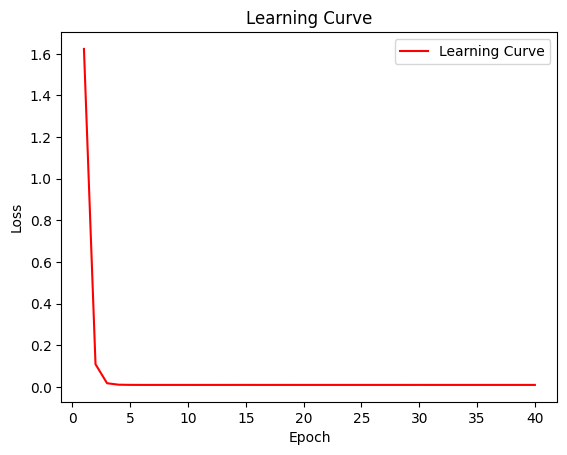

In [63]:
plt.figure()
plt.plot(epoch_history, loss_history, label='Learning Curve', color='red')
plt.title('Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()